In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [78]:
LIST_OF_STAGE_III_COUNTRIES = pd.read_csv("../../../data/UN/countries_in_stage_III.csv")
TFR_OF_STAGE_III_COUNTRIES = pd.read_csv("../../../data/UN/TFR_per_country_stage_III.csv")

MC_SIMULATIONS_PREFIX = "./MC_fertility_"

REGION_OF_INTEREST = "Mauritius"
TFR_OF_INTEREST = TFR_OF_STAGE_III_COUNTRIES[TFR_OF_STAGE_III_COUNTRIES["Region"] == REGION_OF_INTEREST]

MC_SIMULATIONS_FILE = MC_SIMULATIONS_PREFIX + REGION_OF_INTEREST + ".pkl"
with open(MC_SIMULATIONS_FILE, "rb") as handle:
    MC_SIMULATIONS = pickle.load(handle)

N_samples = len(MC_SIMULATIONS)
simulation_len = len(MC_SIMULATIONS[0].path) - 1
simulation_start = TFR_OF_INTEREST['Year'].iloc[-1]
simulation_end = simulation_start + simulation_len + 1
simulation_window = np.arange(simulation_start, simulation_end, 1)

MC_SIMULATIONS_path = [MC_SIMULATIONS[i].path for i in range(N_samples)]

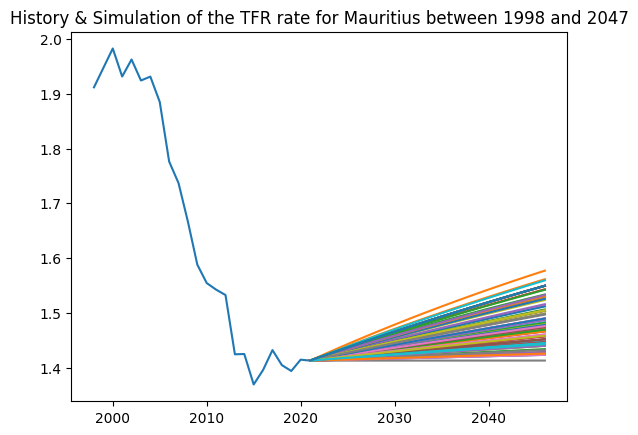

In [79]:
plt.plot(TFR_OF_INTEREST['Year'], TFR_OF_INTEREST['TFR'])
for path in MC_SIMULATIONS_path:
    plt.plot(simulation_window, path)
plt.title(
    f"History & Simulation of the TFR rate for {REGION_OF_INTEREST} between {int(TFR_OF_INTEREST['Year'].iloc[0])} and {int(simulation_end)}")
plt.show()

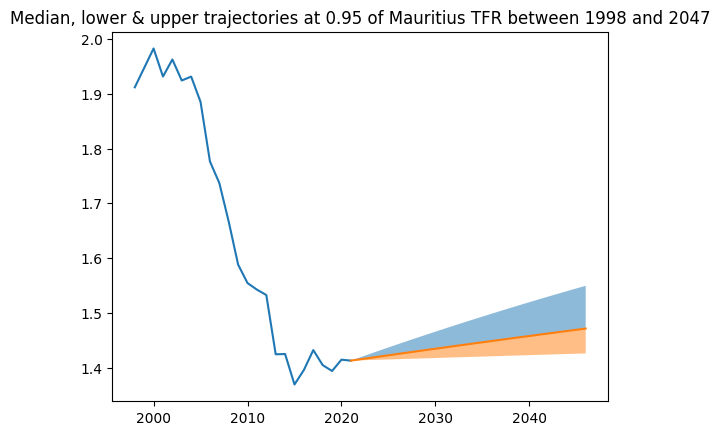

In [80]:
plt.plot(TFR_OF_INTEREST['Year'], TFR_OF_INTEREST['TFR'])
median_trajectory = np.median(MC_SIMULATIONS_path, axis=0)
upper_quantile_95 = np.quantile(MC_SIMULATIONS_path, 0.95, axis=0)
lower_quantile_005 = np.quantile(MC_SIMULATIONS_path, 0.05, axis=0)
plt.plot(simulation_window, median_trajectory)
plt.title(
    f"Median, lower & upper trajectories at 0.95 of {REGION_OF_INTEREST} TFR between {int(TFR_OF_INTEREST['Year'].iloc[0])} and {int(simulation_end)}")
plt.fill_between(simulation_window, median_trajectory, upper_quantile_95, alpha=0.5)
plt.fill_between(simulation_window, median_trajectory, lower_quantile_005, alpha=0.5)
plt.show()

(array([ 1.,  0.,  0.,  1.,  0.,  1.,  0.,  9.,  2.,  0.,  3.,  3.,  2.,
         2.,  8.,  3.,  7.,  9.,  9.,  6.,  5., 17.,  2.,  9.,  1.]),
 array([0.98653149, 0.9870699 , 0.98760831, 0.98814672, 0.98868513,
        0.98922354, 0.98976195, 0.99030036, 0.99083876, 0.99137717,
        0.99191558, 0.99245399, 0.9929924 , 0.99353081, 0.99406922,
        0.99460763, 0.99514604, 0.99568445, 0.99622286, 0.99676127,
        0.99729968, 0.99783808, 0.99837649, 0.9989149 , 0.99945331,
        0.99999172]),
 <BarContainer object of 25 artists>)

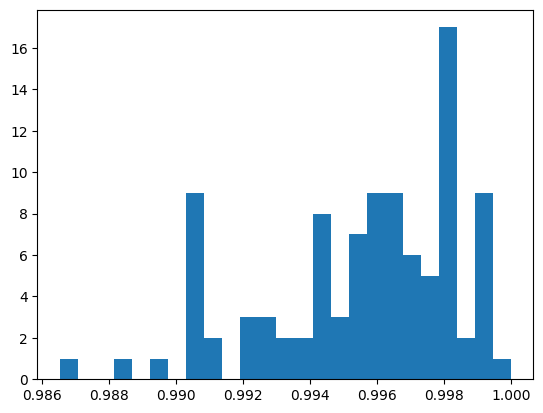

In [81]:
plt.hist([MC_SIMULATIONS[i].rho for i in range(N_samples)], bins=25)

(array([ 2.,  0.,  0.,  1.,  0.,  2.,  0.,  1.,  1.,  1.,  0.,  4.,  1.,
         1.,  1.,  5., 10., 32., 18., 20.]),
 array([1.88941104, 1.8999279 , 1.91044476, 1.92096163, 1.93147849,
        1.94199536, 1.95251222, 1.96302908, 1.97354595, 1.98406281,
        1.99457968, 2.00509654, 2.0156134 , 2.02613027, 2.03664713,
        2.047164  , 2.05768086, 2.06819772, 2.07871459, 2.08923145,
        2.09974832]),
 <BarContainer object of 20 artists>)

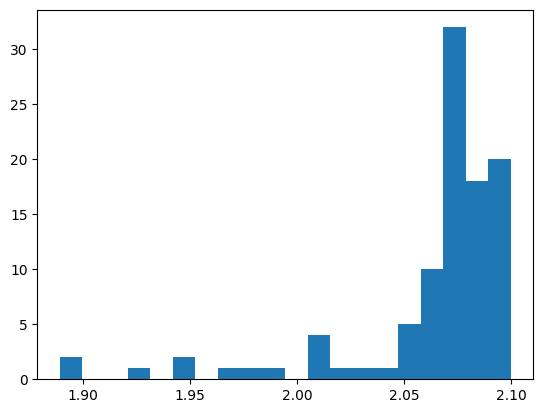

In [82]:
plt.hist([MC_SIMULATIONS[i].mu for i in range(N_samples)], bins=20)

(array([ 1.,  1., 23., 10., 17.,  8., 12., 10.,  4.,  6.,  3.,  2.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([0.03612963, 0.03822785, 0.04032606, 0.04242427, 0.04452249,
        0.0466207 , 0.04871892, 0.05081713, 0.05291534, 0.05501356,
        0.05711177, 0.05920999, 0.0613082 , 0.06340641, 0.06550463,
        0.06760284, 0.06970106, 0.07179927, 0.07389748, 0.0759957 ,
        0.07809391]),
 <BarContainer object of 20 artists>)

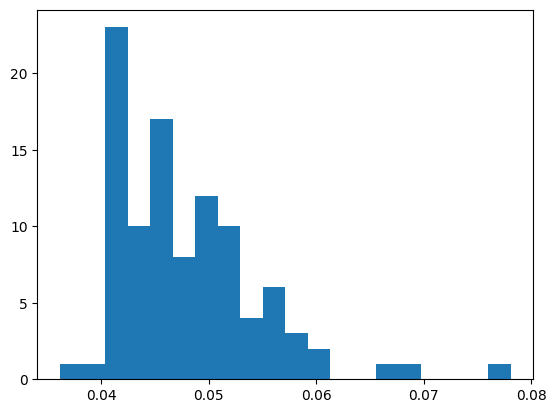

In [83]:
plt.hist([MC_SIMULATIONS[i].sigma_eps for i in range(N_samples)], bins=20)

In [52]:
def plot(REGION_OF_INTEREST):
    MC_SIMULATIONS_FILE = MC_SIMULATIONS_PREFIX + REGION_OF_INTEREST + ".pkl"
    with open(MC_SIMULATIONS_FILE, "rb") as handle:
        MC_SIMULATIONS = pickle.load(handle)

    N_samples = len(MC_SIMULATIONS)
    MC_SIMULATIONS_path = [MC_SIMULATIONS[i].path for i in range(N_samples)]
    TFR_OF_INTEREST = TFR_OF_STAGE_III_COUNTRIES[TFR_OF_STAGE_III_COUNTRIES["Region"] == REGION_OF_INTEREST]
    plt.plot(TFR_OF_INTEREST['Year'], TFR_OF_INTEREST['TFR'])
    simulation_len = len(MC_SIMULATIONS[0].path) - 1
    simulation_start = TFR_OF_INTEREST['Year'].iloc[-1]
    simulation_end = simulation_start + simulation_len + 1
    simulation_window = np.arange(simulation_start, simulation_end, 1)
    MC_SIMULATIONS_path = [MC_SIMULATIONS[i].path for i in range(N_samples)]
    median_trajectory = np.median(MC_SIMULATIONS_path, axis=0)
    upper_quantile_95 = np.quantile(MC_SIMULATIONS_path, 0.95, axis=0)
    lower_quantile_005 = np.quantile(MC_SIMULATIONS_path, 0.05, axis=0)
    plt.plot(simulation_window, median_trajectory)
    plt.title(
        f"Median, lower & upper trajectories at 0.95 of {REGION_OF_INTEREST} TFR between {int(TFR_OF_INTEREST['Year'].iloc[0])} and {int(simulation_end)}")
    plt.fill_between(simulation_window, median_trajectory, upper_quantile_95, alpha=0.5)
    plt.fill_between(simulation_window, median_trajectory, lower_quantile_005, alpha=0.5)
    plt.savefig(f"./MC_SIMULATION_{REGION_OF_INTEREST}.png")
    plt.close()

In [53]:
for REGION_OF_INTEREST in LIST_OF_STAGE_III_COUNTRIES['Region']:
    plot(REGION_OF_INTEREST)

In [61]:
TFR_OF_INTEREST['TFR']

638    1.81635
639    1.80825
640    1.82280
641    1.72655
642    1.68415
643    1.56800
644    1.56460
645    1.61110
646    1.38830
647    1.51505
648    1.75205
649    1.57800
650    1.81445
651    1.53580
652    1.51210
653    1.52480
654    1.50440
655    1.65735
656    1.46320
657    1.59050
658    1.30760
659    1.27530
660    1.56395
661    1.23095
662    1.36245
663    1.28085
664    1.26240
665    1.26345
666    1.28270
667    1.29110
668    1.28145
669    1.22430
670    1.16340
671    1.20395
672    1.27890
673    1.19955
674    1.24810
675    1.22720
676    0.99915
677    0.95520
678    0.94650
679    0.96285
680    0.99655
681    1.02545
Name: TFR, dtype: float64

(array([98.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0.03850976, 0.0385973 , 0.03868484, 0.03877238, 0.03885992,
        0.03894746, 0.039035  , 0.03912255, 0.03921009, 0.03929763,
        0.03938517, 0.03947271, 0.03956025, 0.03964779, 0.03973533,
        0.03982287, 0.03991041, 0.03999795, 0.04008549, 0.04017303,
        0.04026057, 0.04034811, 0.04043565, 0.04052319, 0.04061073,
        0.04069827]),
 <BarContainer object of 25 artists>)

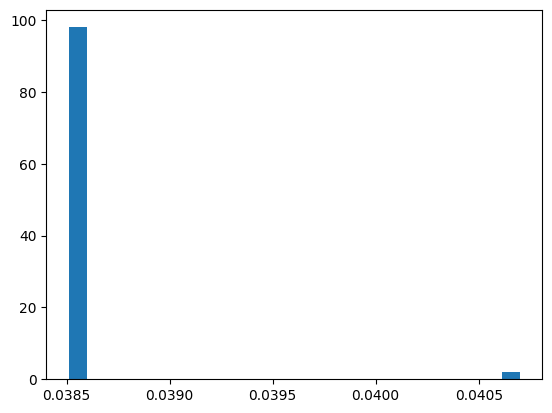

In [42]:
plt.hist([MC_SIMULATIONS[i].sigma_eps for i in range(N_samples)], bins=25)

In [40]:
MC_SIMULATIONS[0].__dir__()

['mu',
 'rho',
 'sigma_mu',
 'sigma_rho',
 'mu_bar',
 'rho_bar',
 'sigma_eps',
 'path',
 '__module__',
 '__doc__',
 '__init__',
 'run',
 'simulate',
 '__dict__',
 '__weakref__',
 '__new__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__getstate__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']